In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("train.csv")
df.head(10)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


<Axes: >

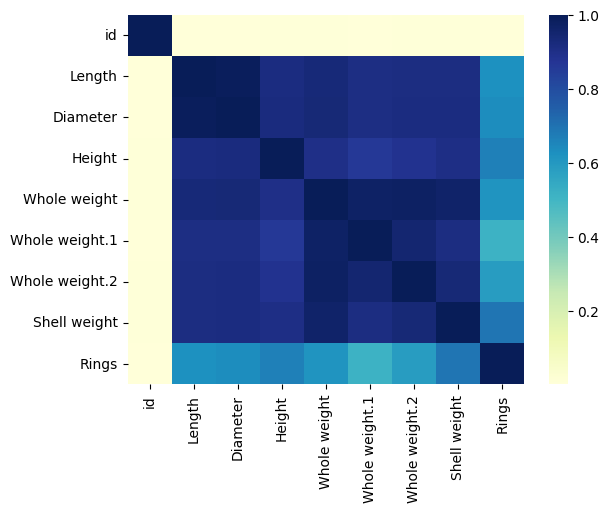

In [57]:
sns.heatmap(df.corr(numeric_only=True),cmap='YlGnBu')


In [6]:
# from sklearn.model_selection import train_test_split

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit

In [60]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(df,df["Rings"]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [7]:
# X_train, X_test, y_train, y_test = train_test_split(df, df["Rings"], test_size=0.2,shuffle = True)

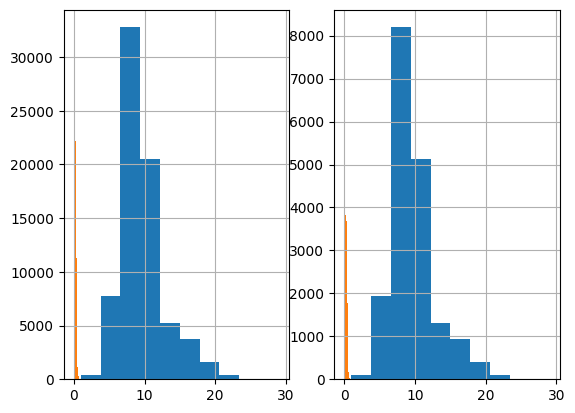

In [62]:
plt.subplot(1,2,1)
strat_train_set["Rings"].hist()
strat_train_set["Shell weight"].hist()

plt.subplot(1,2,2)
strat_test_set["Rings"].hist()
strat_test_set["Shell weight"].hist()
plt.show()


In [63]:
strat_train_set.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
38134,38134,M,0.645,0.500,0.170,1.1450,0.4905,0.2425,0.2750,9
41253,41253,I,0.445,0.340,0.120,0.4085,0.1685,0.0960,0.1100,8
49629,49629,I,0.550,0.425,0.150,0.7510,0.2700,0.1835,0.2030,9
22394,22394,F,0.505,0.395,0.130,0.6445,0.3070,0.1405,0.2155,9
71707,71707,F,0.570,0.440,0.165,0.9660,0.3905,0.2155,0.2700,10


In [10]:
from sklearn.base import BaseEstimator , TransformerMixin

In [98]:
def one_hot_encode_sex(data):
  from sklearn.preprocessing import OneHotEncoder
  import pandas as pd

  encoder = OneHotEncoder(sparse_output=False)  
  encoded_sex = encoder.fit_transform(data[['Sex']])
  column_names = ["Females", "Males", "Infant"]

  
  data_copy = data.copy()
  for i in range(len(encoded_sex.T)):
    data_copy[column_names[i]] = encoded_sex.T[i]

  return data_copy


In [65]:
encoded_strat_train_set = one_hot_encode_sex(strat_train_set)
encoded_strat_train_set.drop('Sex',axis=1,inplace=True)
encoded_strat_train_set.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Females,Males,Infant
38134,38134,0.645,0.500,0.170,1.1450,0.4905,0.2425,0.2750,9,0.0,0.0,1.0
41253,41253,0.445,0.340,0.120,0.4085,0.1685,0.0960,0.1100,8,0.0,1.0,0.0
49629,49629,0.550,0.425,0.150,0.7510,0.2700,0.1835,0.2030,9,0.0,1.0,0.0
22394,22394,0.505,0.395,0.130,0.6445,0.3070,0.1405,0.2155,9,1.0,0.0,0.0
71707,71707,0.570,0.440,0.165,0.9660,0.3905,0.2155,0.2700,10,1.0,0.0,0.0


In [66]:
from sklearn.preprocessing import StandardScaler
X = encoded_strat_train_set.drop(['Rings'],axis=1)
y = encoded_strat_train_set['Rings']
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

clf = XGBRegressor()

param_grid = [
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10]}
    ]

grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'max_depth': [None, 5, 10],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
final_clf = grid_search.best_estimator_
final_clf

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
encoded_strat_test_set = one_hot_encode_sex(strat_test_set)
encoded_strat_test_set.drop('Sex',axis=1,inplace=True)
encoded_strat_test_set.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Females,Males,Infant
9236,9236,0.420,0.315,0.110,0.3535,0.1645,0.0825,0.095,6,0.0,1.0,0.0
39952,39952,0.570,0.465,0.140,0.8490,0.3785,0.1725,0.202,10,0.0,0.0,1.0
56939,56939,0.610,0.470,0.155,1.2240,0.5265,0.2705,0.270,9,1.0,0.0,0.0
70869,70869,0.585,0.475,0.160,0.9205,0.4355,0.2035,0.260,12,0.0,1.0,0.0
89218,89218,0.470,0.395,0.120,0.5785,0.2175,0.1500,0.167,10,0.0,0.0,1.0


In [71]:
X_test = encoded_strat_test_set.drop(['Rings'],axis=1)
y_test = encoded_strat_test_set['Rings']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [72]:
final_clf.score(X_data_test,y_data_test)

0.6543941642649598

In [80]:
final_data = pd.read_csv('train.csv')

In [81]:
final_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [82]:
final_data = one_hot_encode_sex(final_data)
final_data.drop('Sex',axis=1,inplace=True)
final_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Females,Males,Infant
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0


In [83]:
X_final = final_data.drop(['Rings'],axis=1)
y_final = final_data['Rings']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()


In [84]:
X_data_final

array([[-1.73203169,  0.27831734,  0.28891218, ...,  1.55566039,
        -0.75849213, -0.72158997],
       [-1.73199346,  0.95504436,  0.90099607, ...,  1.55566039,
        -0.75849213, -0.72158997],
       [-1.73195524, -3.02072689, -2.97553525, ..., -0.64281382,
         1.31840524, -0.72158997],
       ...,
       [ 1.73195524, -0.69447776, -0.73122764, ..., -0.64281382,
         1.31840524, -0.72158997],
       [ 1.73199346, -1.45579566, -1.34331154, ..., -0.64281382,
         1.31840524, -0.72158997],
       [ 1.73203169, -0.77906863, -0.78223464, ..., -0.64281382,
         1.31840524, -0.72158997]])

In [85]:
prod_clf = XGBRegressor()

param_grid = [
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10]}
    ]

grid_search = GridSearchCV(prod_clf,param_grid,cv=3,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'max_depth': [None, 5, 10],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
prod_final_clf = grid_search.best_estimator_

In [87]:
prod_final_clf

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
test_data = pd.read_csv('test.csv')

In [89]:
test_data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [90]:
test_data = one_hot_encode_sex(test_data)
test_data.drop('Sex',axis=1,inplace=True)
test_data.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Females,Males,Infant
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0.0,0.0,1.0
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0.0,0.0,1.0
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.0,0.0,1.0
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.0,0.0,1.0
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0.0,1.0,0.0


In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Length          60411 non-null  float64
 2   Diameter        60411 non-null  float64
 3   Height          60411 non-null  float64
 4   Whole weight    60411 non-null  float64
 5   Whole weight.1  60411 non-null  float64
 6   Whole weight.2  60411 non-null  float64
 7   Shell weight    60411 non-null  float64
 8   Females         60411 non-null  float64
 9   Males           60411 non-null  float64
 10  Infant          60411 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.1 MB


In [92]:
X_final_test = test_data

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [93]:
predictions = prod_final_clf.predict(X_data_final_test)

In [94]:
predictions

array([ 9.93429 ,  9.603388, 10.129229, ..., 10.852065, 13.28679 ,
        9.003515], dtype=float32)

In [95]:
submission_df = pd.DataFrame({'id': test_data['id'], 'Rings': predictions})

In [96]:
submission_df.to_csv('submission.csv',index=False)

In [97]:
sub = pd.read_csv('submission.csv')
sub.head()

,id,Rings
0,90615,9.934290
1,90616,9.603388
2,90617,10.129229
3,90618,9.866602
4,90619,8.529511
